In [1]:
import pandas as pd
import numpy as np
import sys
import os

In [2]:
coverage_type_dtype = pd.CategoricalDtype(list('NAUR'), ordered=True)

In [3]:
# step1: load all downloaded data

In [4]:
def load_file_preprocess(filename):
    usecols = [
        'CountryCode', 'CountryName', 'CoverageType', 'RequestYear',
        'HeadCount', 'ReqYearPopulation', 'Mean'
    ]
    df = pd.read_csv(filename, usecols=usecols,
                     dtype={'CoverageType': coverage_type_dtype})
    df = df.rename(
        columns={
            'CountryCode': 'country',
            'CoverageType': 'coverage_type',
            'RequestYear': 'year'
        })
    df = df.set_index(['country', 'year', 'coverage_type'])
    return df

In [5]:
res = {}

for f in os.listdir('../source/'):
    if f.endswith('.csv'):
        fn = f.split('.')[0]
        bracket = fn.lstrip('0')
        if bracket == '':
            bracket = 0
        else:
            bracket = int(bracket)
        res[bracket] = load_file_preprocess(os.path.join('../source/', f))
        

In [6]:
res[0]

,,,CountryName,Mean,HeadCount,ReqYearPopulation
country,year,coverage_type,,,,
ALB,1981,N,Albania,220.77280,0.000000,2.726056
DZA,1981,N,Algeria,240.87570,0.000000,19.824301
AGO,1981,N,Angola,166.38240,0.000000,8.640446
ARG,1981,U,Argentina,671.63370,0.002289,23.609667
ARM,1981,N,Armenia,285.08040,0.000130,3.148096
...,...,...,...,...,...,...
VNM,2019,N,Vietnam,348.77690,0.000000,96.462106
PSE,2019,N,West Bank and Gaza,328.30880,0.000000,4.685306
YEM,2019,N,"Yemen, Republic of",70.69390,0.000000,29.161922


In [7]:
# check nans

In [8]:
for k, df in res.items():
    if df['HeadCount'].hasnans:
        print(k)
        print(df[pd.isnull(df['HeadCount'])])

44
                           CountryName  Mean  HeadCount  ReqYearPopulation
country year coverage_type                                                
IND     2018 A                   India   NaN        NaN        1352.617328
             R                   India   NaN        NaN         892.321651
             U                   India   NaN        NaN         460.295677
        2019 A                   India   NaN        NaN        1366.417754
             R                   India   NaN        NaN         895.386226
             U                   India   NaN        NaN         471.031528
95
                           CountryName  Mean  HeadCount  ReqYearPopulation
country year coverage_type                                                
IND     2018 A                   India   NaN        NaN        1352.617328
             R                   India   NaN        NaN         892.321651
             U                   India   NaN        NaN         460.295677
        2019 A     

                           CountryName  Mean  HeadCount  ReqYearPopulation
country year coverage_type                                                
IND     2018 A                   India   NaN        NaN        1352.617328
             R                   India   NaN        NaN         892.321651
             U                   India   NaN        NaN         460.295677
        2019 A                   India   NaN        NaN        1366.417754
             R                   India   NaN        NaN         895.386226
             U                   India   NaN        NaN         471.031528
168
                           CountryName  Mean  HeadCount  ReqYearPopulation
country year coverage_type                                                
IND     2018 A                   India   NaN        NaN        1352.617328
             R                   India   NaN        NaN         892.321651
             U                   India   NaN        NaN         460.295677
        2019 A       

188
                           CountryName  Mean  HeadCount  ReqYearPopulation
country year coverage_type                                                
IND     2018 A                   India   NaN        NaN        1352.617328
             R                   India   NaN        NaN         892.321651
             U                   India   NaN        NaN         460.295677
        2019 A                   India   NaN        NaN        1366.417754
             R                   India   NaN        NaN         895.386226
             U                   India   NaN        NaN         471.031528
1
                           CountryName  Mean  HeadCount  ReqYearPopulation
country year coverage_type                                                
IND     2018 A                   India   NaN        NaN        1352.617328
             R                   India   NaN        NaN         892.321651
             U                   India   NaN        NaN         460.295677
        2019 A     

In [9]:
# So all of India 2018/19 are NaNs in it. let's drop them for now

In [10]:
res1 = dict()
for k, df in res.items():
    res1[k] = df.dropna(how='any', subset=['HeadCount'])

In [11]:
# step2: subtract and get bracket head count

In [12]:
res2 = {}

for i in range(1, 200):
    df1 = res1[i]
    df2 = res1[i-1]
    df3 = df1['HeadCount'] - df2['HeadCount']
    res2[i-1] = df3

In [13]:
res2[0]

country  year  coverage_type
ALB      1981  N                0.000000e+00
DZA      1981  N                0.000000e+00
AGO      1981  N                0.000000e+00
ARG      1981  U                3.320000e-07
ARM      1981  N                2.703000e-07
                                    ...     
VNM      2019  N                0.000000e+00
PSE      2019  N                0.000000e+00
YEM      2019  N                0.000000e+00
ZMB      2019  N                0.000000e+00
ZWE      2019  N                0.000000e+00
Name: HeadCount, Length: 6639, dtype: float64

In [14]:
# double check nans

In [15]:
for k, df in res2.items():
    if df.hasnans:
        print(k)
        print(df[pd.isnull(df)])

In [16]:
# ok, looks good

In [17]:
# step 3: create df with bracket info

In [18]:
res3 = []

for k, v in res2.items():
    df = v.reset_index()
    df['bracket'] = k
    df = df.set_index(['country', 'year', 'coverage_type', 'bracket'])
    res3.append(df)

In [19]:
res3 = pd.concat(res3)

In [20]:
res3

,,,,HeadCount
country,year,coverage_type,bracket,
ALB,1981,N,0,0.000000e+00
DZA,1981,N,0,0.000000e+00
AGO,1981,N,0,0.000000e+00
ARG,1981,U,0,3.320000e-07
ARM,1981,N,0,2.703000e-07
...,...,...,...,...
VNM,2019,N,198,0.000000e+00
PSE,2019,N,198,0.000000e+00
YEM,2019,N,198,0.000000e+00


In [21]:
res3['HeadCount'].hasnans

False

In [22]:
# assume each group has 199 datapoints

In [23]:
gs = res3.groupby(['country', 'year', 'coverage_type'])
for g in gs.groups.keys():
    df = gs.get_group(g)
    assert df.shape[0] == 199

In [24]:
# step 4: fix negative values, fix sum of all brackets > 1

In [25]:
import matplotlib.pyplot as plt
%matplotlib inline

In [26]:
plt.rcParams['figure.figsize'] = [12, 8]

In [27]:
res4 = res3.copy()

In [28]:
res4.loc[res4['HeadCount'] < 0, 'HeadCount'] = np.nan  # make negative values to nan

In [29]:
# also, drop all big noise. Notes on slack discussion

In [30]:
gs = res4.groupby(['country', 'year', 'coverage_type'])

In [31]:
res5 = list()

In [32]:
for g in gs.groups.keys():
    df = gs.get_group(g)
    s = df['HeadCount'].copy()
    todrop = set()
    if s.hasnans and s.sum() > 1:  # if negative values exists and sum bigger than 1
        where = np.where(pd.isnull(s))[0]
        for w in where:
            todrop.add(w-1)
            todrop.add(w)
            todrop.add(w+1)
        s.iloc[list(todrop)] = np.nan
        res5.append(s)
    else:
        res5.append(s)

In [33]:
res5 = pd.concat(res5)

In [34]:
gs = res5.groupby(['country', 'year', 'coverage_type'])

In [35]:
res5

country  year  coverage_type  bracket
AGO      1981  N              0          0.0
                              1          0.0
                              2          0.0
                              3          0.0
                              4          0.0
                                        ... 
ZWE      2019  N              194        0.0
                              195        0.0
                              196        0.0
                              197        0.0
                              198        0.0
Name: HeadCount, Length: 1321161, dtype: float64

In [36]:
# look for those sum bigger than 1
for g in gs.groups.keys():
    df = gs.get_group(g)
    if df.sum() > 1.1:
        print(g)

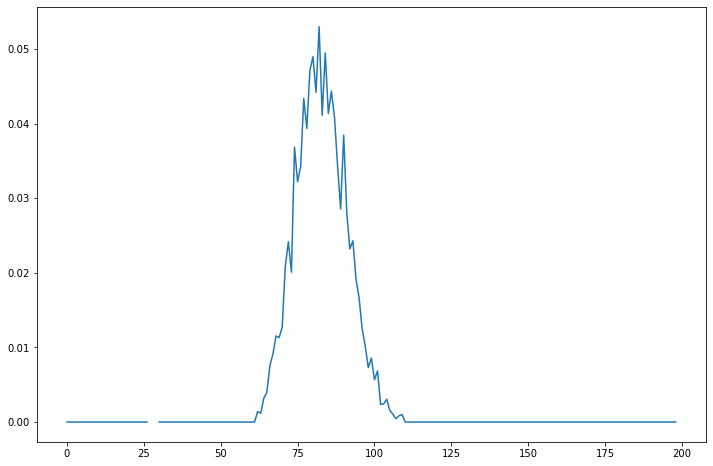

In [37]:
gs = res5.groupby(['country', 'year', 'coverage_type'])
df = gs.get_group(('STP', 1999, 'N'))
plt.plot(df.values)

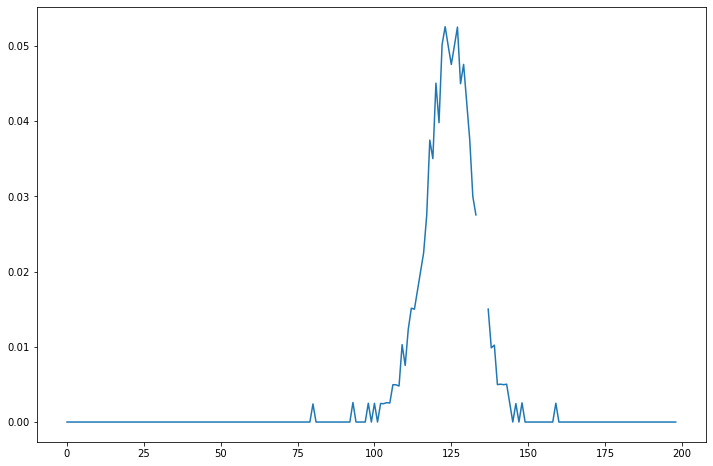

In [38]:
gs = res5.groupby(['country', 'year', 'coverage_type'])
df = gs.get_group(('DEU', 2019, 'N'))
plt.plot(df.values)

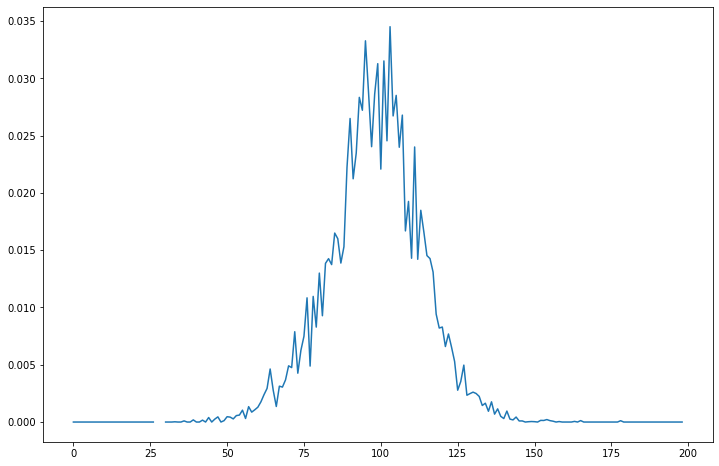

In [39]:
gs = res5.groupby(['country', 'year', 'coverage_type'])
df = gs.get_group(('PRY', 1999, 'N'))
plt.plot(df.values)

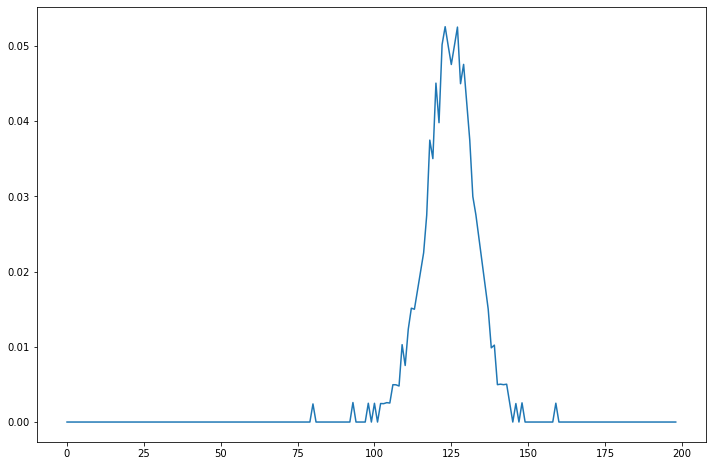

In [40]:
# before smoothing we need to interpolate the values
# now we try if interpolating is ok
gs = res5.groupby(['country', 'year', 'coverage_type'])
df = gs.get_group(('DEU', 2019, 'N'))
plt.plot(df.interpolate().values)

In [41]:
# step 5: smoothing them

In [42]:
sys.path.insert(0, '../scripts')
import smoothlib

In [43]:
run_smooth = smoothlib.run_smooth

In [70]:
def func(x):
    """function to smooth a series"""
    if x.hasnans:
        x = x.interpolate()
        if pd.isnull(x.iloc[0]):
            x = x.fillna(0)
    # x = x.reset_index(drop=True)
    # run smoothing
    std = x.std()
    if std < 0.012:
        res = run_smooth(x, 25, 2)
        res = run_smooth(res, 20, 1)
        res = run_smooth(res, 16, 1)
        res = run_smooth(res, 10, 0)
        res = run_smooth(res, 10, 0)
    else:
        res = run_smooth(x, 20, 1)
        res = run_smooth(res, 16, 1)
        res = run_smooth(res, 16, 0)
        res = run_smooth(res, 10, 0)
        res = run_smooth(res, 8, 0)
    # also, make sure it will sum up to 100%
    res = res / res.sum()
    return res

In [45]:
gs = res5.groupby(['country', 'year', 'coverage_type'])

In [46]:
df = gs.get_group(('PAK', 2000, 'N'))

In [47]:
df.std()

0.013582933144582117

In [48]:
s = func(df)

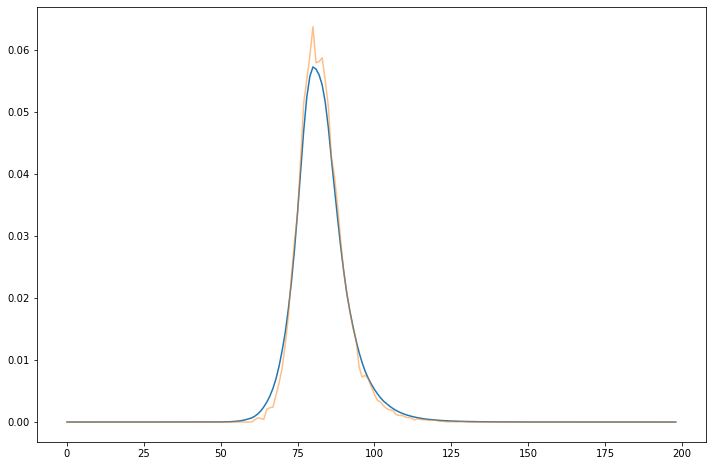

In [49]:
plt.plot(s)
plt.plot(df.values, alpha=.5)

In [50]:
df.index[0]

('PAK', 2000, 'N', 0)

In [51]:
def process(ser):
    idx = ser.index
    try:
        s_new = func(ser)
        s_new.index = idx
    except:
        print(idx[0])
        return pd.Series()
    return s_new

In [52]:
process(df)

country  year  coverage_type  bracket
PAK      2000  N              0           0.000000e+00
                              1           0.000000e+00
                              2          4.940656e-324
                              3          4.940656e-324
                              4          4.940656e-324
                                             ...      
                              194         9.457467e-10
                              195         6.099754e-10
                              196         3.764365e-10
                              197         2.204129e-10
                              198         1.213123e-10
Length: 199, dtype: float64

In [53]:
from multiprocessing import Pool

In [54]:
d1 = gs.get_group(('PAK', 2000, 'N'))
d2 = gs.get_group(('USA', 2000, 'N'))

In [55]:
with Pool(7) as p:
    res6 = p.map(process, [d1, d2])

In [56]:
pd.concat(res6)

country  year  coverage_type  bracket
PAK      2000  N              0           0.000000e+00
                              1           0.000000e+00
                              2          4.940656e-324
                              3          4.940656e-324
                              4          4.940656e-324
                                             ...      
USA      2000  N              194         6.468461e-07
                              195         3.215924e-07
                              196         1.373022e-07
                              197         4.576742e-08
                              198         9.153483e-09
Length: 398, dtype: float64

In [57]:
to_smooth = list()
for g, df in gs:
    to_smooth.append(df)

In [58]:
len(to_smooth)

6639

In [59]:
with Pool(11) as p:
    res6 = p.map(process, to_smooth)

/usr/local/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


('CHN', 1981, 'A', 0)


<ipython-input-51-b66fb3d3fe6b>:8: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  return pd.Series()


('CHN', 1981, 'R', 0)


/usr/local/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


('CHN', 1986, 'A', 0)
('CHN', 1986, 'U', 0)


/usr/local/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/usr/local/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


('SUR', 1982, 'U', 0)


<ipython-input-51-b66fb3d3fe6b>:8: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  return pd.Series()


('SWZ', 1981, 'N', 0)


<ipython-input-51-b66fb3d3fe6b>:8: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  return pd.Series()


('SWZ', 1982, 'N', 0)
('SWZ', 1983, 'N', 0)
('SWZ', 1984, 'N', 0)
('SWZ', 1985, 'N', 0)
('SUR', 1984, 'U', 0)
('SUR', 1990, 'U', 0)
('SWZ', 2000, 'N', 0)
('SUR', 1999, 'U', 0)
('SUR', 2019, 'U', 0)


In [72]:
missing = [
    ('CHN', 1981, 'A'),
    ('CHN', 1981, 'R'),
    ('CHN', 1986, 'A'),
    ('CHN', 1986, 'U'),
    ('SUR', 1982, 'U'),
    ('SWZ', 1981, 'N'),
    ('SWZ', 1982, 'N'),
    ('SWZ', 1983, 'N'),
    ('SWZ', 1984, 'N'),
    ('SWZ', 1985, 'N'),
    ('SUR', 1984, 'U'),
    ('SUR', 1990, 'U'),
    ('SWZ', 2000, 'N'),
    ('SUR', 1999, 'U'),
    ('SUR', 2019, 'U'),
]

In [75]:
t = gs.get_group(('SUR', 1982, 'U'))
t

country  year  coverage_type  bracket
SUR      1982  U              0          0.000000
                              1          0.003542
                              2          0.000000
                              3          0.000000
                              4          0.000000
                                           ...   
                              194        0.000000
                              195        0.000000
                              196        0.000000
                              197        0.000000
                              198        0.000000
Name: HeadCount, Length: 199, dtype: float64

In [78]:
t.hasnans

False

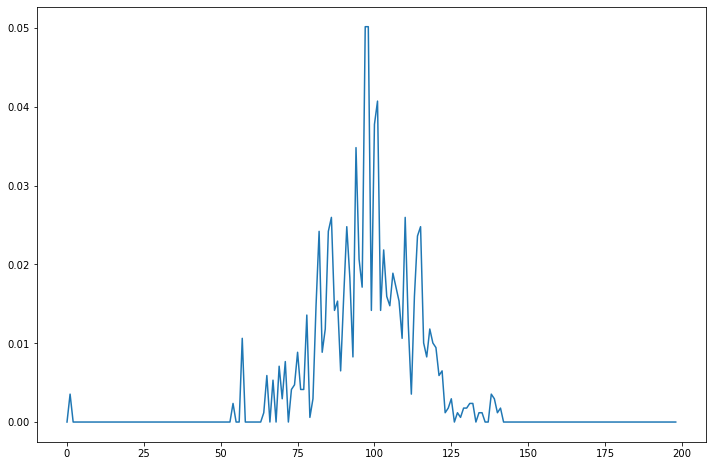

In [77]:
plt.plot(t.values)

In [85]:
import importlib
importlib.reload(smoothlib)

<module 'smoothlib' from '/usr/home/semio/src/work/gapminder/datasets/repo/github.com/open-numbers/ddf--worldbank--povcalnet/etl/notebooks/../scripts/smoothlib.py'>

In [86]:
run_smooth = smoothlib.run_smooth

In [87]:
func(t)

0      0.000015
1      0.000017
2      0.000019
3      0.000021
4      0.000023
         ...   
194    0.000000
195    0.000000
196    0.000000
197    0.000000
198    0.000000
Length: 199, dtype: float64

In [88]:
for g in missing:
    print(g)
    t = gs.get_group(g)
    func(t)

('CHN', 1981, 'A')
('CHN', 1981, 'R')
('CHN', 1986, 'A')
('CHN', 1986, 'U')
('SUR', 1982, 'U')
('SWZ', 1981, 'N')
('SWZ', 1982, 'N')
('SWZ', 1983, 'N')
('SWZ', 1984, 'N')
('SWZ', 1985, 'N')
('SUR', 1984, 'U')
('SUR', 1990, 'U')
('SWZ', 2000, 'N')
('SUR', 1999, 'U')
('SUR', 2019, 'U')


In [93]:
res7 = [x for x in res6 if not x.empty]

In [94]:
for g in missing:
    # print(g)
    t = gs.get_group(g)
    res7.append(process(t))

In [95]:
res7 = pd.concat(res7)

In [96]:
res7

country  year  coverage_type  bracket
AGO      1981  N              0           1.502705e-05
                              1           1.777000e-05
                              2           2.081764e-05
                              3           2.411089e-05
                              4           2.775329e-05
                                             ...      
SUR      2019  U              194         0.000000e+00
                              195         0.000000e+00
                              196         0.000000e+00
                              197       -4.940656e-324
                              198         0.000000e+00
Length: 1321161, dtype: float64

In [98]:
res7.name = 'population_percentage'
res7 = res7.reset_index()

In [100]:
res7['country'] = res7['country'].map(str.lower)
res7['coverage_type'] = res7['coverage_type'].map(str.lower)

In [101]:
from ddf_utils.str import format_float_digits

In [102]:
from functools import partial

In [103]:
formattor = partial(format_float_digits, digits=6)

In [104]:
res7['population_percentage'] = res7['population_percentage'].map(formattor)

In [106]:
!mkdir ../wip/smoothmountain

In [107]:
res7.to_csv('../wip/smoothmountain/ddf--datapoints--population_percentage--by--country--year--coverage_type--bracket.csv', index=False)